<a href="https://colab.research.google.com/github/jakep3/Project-4/blob/master/Project_4_Philpott_Hydrophone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run This First

In [0]:
#You must hit "restart runtime", then run the two lines of code below for the first time around. 

!pip install obspy
!pip install --upggrade seaborn == 0.9.0


from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M

import matplotlib
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

%matplotlib inline

from scipy.fftpack import fft







Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upggrade


# The Assignment

##Part 1 Wind and Rain Noise

###Oregon Shelf Cabled BEP
CE02SHBP Data

In [0]:
#identify data for the following (1)-(4) time periods. 

#(1) not Windy and not Rainy, (2) Windy but not Rainy , (3) Rainy but not Windy, (4) Windy and Rainy
data_1_name = print('(shelf) Not windy and not rainy')
data_2_name= print('(shelf) Windy but not rainy')
data_3_name= print('(shelf) Rainy but not windy')
data_4_name = print('(shelf) Windy and rainy')


#(1) datetime.datetime(2019, 6, 19, 15, 20, 4, tzinfo=<DstTzInfo 'US/Pacific' PDT-1 day, 17:00:00 DST>)
data_url_1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/06/19/OO-HYEA2--YDH-2019-06-19T15:20:00.000015.mseed' 

#(2) datetime.datetime(2019, 12, 14, 3, 48, 8, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>),
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/12/14/OO-HYEA2--YDH-2019-12-14T03:48:07.738000.mseed'

#(3) datetime.datetime(2019, 1, 8, 9, 1, 13, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>)
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/08/OO-HYEA2--YDH-2019-01-08T09:00:00.000016.mseed'

#(4) datetime.datetime(2019, 1, 6, 13, 1, 13, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>)
data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/01/06/OO-HYEA2--YDH-2019-01-06T13:00:00.000015.mseed'


#make strings to read the raw hydrophone data in each time period.
st1 = read(data_url_1)     # (1) 
st2 = read(data_url_2)     # (2) 
st3 = read(data_url_3)     # (3) 
st4 = read(data_url_4)     # (4) 

(shelf) Not windy and not rainy
(shelf) Windy but not rainy
(shelf) Rainy but not windy
(shelf) Windy and rainy


TypeError: ignored

In [0]:
#Checking the sampling rates. 


fs1 = st1[0].stats.sampling_rate

#fs2 = st2[0].stats.sampling_rate
#fs3 = st3[0].stats.sampling_rate
#fs4 = st4[0].stats.sampling_rate

#print('Sampling rate of (1) is '+str(fs1)+' Hz.') 
#print('Sampling rate of (2) is '+str(fs2)+' Hz.') 
#print('Sampling rate of (3) is '+str(fs3)+' Hz.') 
#print('Sampling rate of (4) is '+str(fs4)+' Hz.') 

print('Sampling rate for all is 64000Hz')

fs = fs1
print(fs)

###Oregon Offshore Cabled BEP
CE04OSBP Data

In [0]:
#identify data for the following (1)-(4) time periods. 

#(5) not Windy and not Rainy, (6) Windy but not Rainy , (7) Rainy but not Windy, (8) Windy and Rainy

data_5_name = print('(offshore) Not windy and not rainy')
data_6_name= print('(offshore) Windy but not rainy')
data_7_name = print('(offshore) Rainy but not windy')
data_8_name = print('(offshore) Windy and rainy')

#(5) datetime.datetime(2019, 3, 2, 9, 4, 20, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/02/OO-HYEA1--YDH-2019-03-02T09:00:00.000015.mseed'

#(6)  datetime.datetime(2019, 2, 1, 2, 4, 20, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>)
data_url_6 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/01/OO-HYEA1--YDH-2019-02-01T02:00:00.000016.mseed'

#(7) datetime.datetime(2019, 1, 20, 10, 4, 20, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>)
data_url_7 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/20/OO-HYEA1--YDH-2019-01-20T10:00:00.000015.mseed'

#(8)  datetime.datetime(2019, 1, 6, 13, 4, 20, tzinfo=<DstTzInfo 'US/Pacific' PST-1 day, 16:00:00 STD>)
data_url_8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/06/OO-HYEA1--YDH-2019-01-06T13:00:00.000000.mseed'

#make strings to read the raw hydrophone data in each time period.

st5 = read(data_url_5)     # (5)

st6 = read(data_url_6)     # (6)

st7 = read(data_url_7)     # (7)

st8 = read(data_url_8)     # (8) 


In [0]:
#checking the sampling rates

#fs5 = st5[0].stats.sampling_rate

#fs6 = st6[0].stats.sampling_rate
#fs7 = st7[0].stats.sampling_rate
#fs8 = st8[0].stats.sampling_rate

#print('Sampling rate of (5) is '+str(fs5)+' Hz.') 
#print('Sampling rate of (6) is '+str(fs6)+' Hz.') 
#print('Sampling rate of (7) is '+str(fs7)+' Hz.') 
#print('Sampling rate of (8) is '+str(fs8)+' Hz.') 

print("Sampling rate (fs) for all is 64000Hz ")

### Power Spectral Density (PSD) 

Function to use for Part I

Code from GitHub

In [0]:
#This is making a PSD plotting function which will be used to calculate the PSD and Plot it vs Frequency


def psdPlot(st):
  psdAvg = 0
  psdSum = 0
  K=0
  for i in range(0,(int(st[0].stats.endtime.timestamp)-int(st[0].stats.starttime.timestamp))):
    t_start = st[0].stats.starttime+i
    t_end = t_start+1
    sliced = st.slice(t_start, t_end)
    #sliced.plot()
    x = (sliced[0].data)*np.hanning(len(sliced[0].data))
    xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
    fre = np.linspace(1,fs,64000)
    data_db = 10*np.log10(np.abs(xfft))+169-128.9 #This has to be summed together and divided by counter K 
    psdSum += data_db
    K+=1
  psdAvg = psdSum/K
  fig, host = plt.subplots(figsize=(18,9))
  #plt.figure(figsize=(18,9))
  host.plot(fre[0:32000], psdAvg[0:32000],label='PSD')

  #Pick the max and min frequencies that should be displayed
  fmin=0
  fmax=15000

  #Show average PSD line (not required)
  matplotlib.axes.Axes.axhline(self=host,y=psdAvg[fmin:fmax].mean(),xmin=fmin,xmax=fmax,c='red', linestyle = 'dashed') #not required


  host.set_title('PSD vs. Frequency')
  host.tick_params(gridOn=True)
  host.tick_params(axis='x')
  host.locator_params(axis='y', nbins=25)
  host.locator_params(axis='x', nbins=15)
  host.tick_params(axis='both', labelsize=15)  
  host.set_xlabel('Frequency (Hz)', fontsize = 20)
  host.set_ylabel('PSD (dB^2/Hz)', fontsize = 20)
  host.set_xlim(fmin,fmax)
  host.set_ylim(psdAvg[fmin:fmax].min()-5,100)

Plotting PSD vs Frequency for each site 

In [0]:
print('(1 shelf)')
psdPlot(st1)
plt.title('PSD vs. Frequency [Shelf - Not Rainy and Not Windy]', fontsize = 20)

In [0]:
print('(2 shelf)')
psdPlot(st2)
plt.title('PSD vs. Frequency [Shelf - Windy but not Rainy]', fontsize = 20)

In [0]:
print('(3 shelf)') 
psdPlot(st3)
plt.title('PSD vs. Frequency [Shelf - Rainy but not Windy]', fontsize = 20)

In [0]:
print('(4 shelf)')
psdPlot(st4)
plt.title('PSD vs. Frequency [Shelf - Rainy and Windy]', fontsize = 20)

In [0]:
print('(5 offshore)')
psdPlot(st5)
plt.title('PSD vs. Frequency [Offshore - not Rainy and not Windy]', fontsize = 20)

In [0]:
print('(6 offshore)')
psdPlot(st6)
plt.title('PSD vs. Frequency [Offshore - Windy but not Rainy]', fontsize = 20)

In [0]:
print('(7 offshore)')
psdPlot(st7)
plt.title('PSD vs. Frequency [Offshore - Rainy but not Windy]', fontsize = 20)

In [0]:
print('(8 offshore)') 
psdPlot(st8)
plt.title('PSD vs. Frequency [Offshore - Rainy and Windy]', fontsize = 20)

## Part 2 Airgun, Marine Mammals, Earthquake/Volcano Noise

Data can be any time from any location listed in this link : https://oceanobservatories.org/instrument-series/hydbba/

In [0]:
#1 Find short time period that there is a MARINE MAMMAL vocalization in recorded data and plot its spectrogram

#use the whale call october 6 2017 (RS01SLBS)

Mammal_Data = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
stMammal = read(Mammal_Data)

#plotting the spectrogram

fs = 64000 #Hz
st = stMammal
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 30
sliced = st.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('(Mammal) - Freq vs Time')
plt.colorbar()
plt.ylim(0,5000)

4000


(0, 14000)

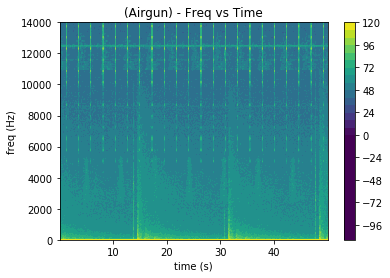

In [0]:
#2 Find a short time period that there is an AIRGUN in recorded data and plot its spectrogram

#use Axial Seabase August 1 2019 (RS03AXBS)

Airgun_Data = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:00:00.000015.mseed'
stAirgun = read(Airgun_Data)


#Plotting the spectrogram 

fs = 64000
st = stAirgun
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 50 
sliced = st.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('(Airgun) - Freq vs Time')
plt.colorbar()
plt.ylim(0,14000)

In [0]:
#3 Find a short time period that there is an earthquake or a volcano eruption in recorded data and plot its spectrogram
 
 #Axial seamount earthquake (CE04OSBP)

EV_Data = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2017/04/15/OO-HYEA1--YDH-2017-04-15T14:45:00.000000.mseed' 

stEV = read(EV_Data)


#Plotting the spectrogram

fs = 64000
st = stEV
t_start = st[0].stats.starttime +180
t_end = st[0].stats.starttime + 280 
sliced = st.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('(Earthquake/Volcano) - Freq vs Time')
plt.colorbar()
plt.ylim(0,150)


In [0]:
#4 Compare the bandwidth of these three signals (1 point). Are they consistent with what is shown in the Wenz curve (refer to the Ocean Noise slides)?

#this will be answered in the report. 